# The focus of this assignment is to evaluate how each algorithm performs in predicting defaults
Perform some basic exploratory analysis to understand the structure and characteristics of the
dataset. You could start by generating some summary statistics, visualizing the distributions of
key variables, and examining the balance between default and non-default instances.

 The insights
gained from this exploration will form the basis for your subsequent modeling work.

## Dataset

Dataset
You will begin by loading the credit card defaults.csv file into your Python environment.
The dataset contains information on 30,000 credit card clients from Taiwan and includes the
following attributes:
1. ID: Client identifier
2. LIMIT BAL: Credit limit (NT dollars)
3. SEX: Gender ( 1 = Male, 2 = Female)
4. EDUCATION: Education level ( 1 = Graduate, 2 = University, 3 = High school, 4 = Others)
5. MARRIAGE: Marital status ( 1 = Married, 2 = Single, 3 = Others )
6. AGE: Age in years
7. P AY 0 to P AY 6: Repayment status in past 6 months ( −1 = paid in full, 1 − 9 = months
late )
8. BILL AMT1 to BILL AMT6: Bill statement amount for the last 6 months
9. P AY AMT1 to P AY AMT6: Amount paid in the last 6 months
10. def ault.payment.next.month: Target variable ( 1 = Default, 0 = No Default)

## Import all the necessary python modules

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Exploratory analysis

1) summary statistics
2) visualizing the distributions of key variables
3) examining the balance between default and non-default instances.

## Importing the dataset and Running some exploratory analysis 
### Renaming target variable 'default payment next month' to 'Credit Default Status' 

1. Skipping First row as i see headers are named X1 to X23 rather use meaningful names as headers
2. Renaming target variable 'default payment next month' to 'Credit Default Status' 

In [26]:
# Skipping First row as i see headers are named X1 to X23 rather use meaningful headers
df = pd.read_csv('credit_card_defaults.csv', skiprows=1)

# Renaming target variable 'default payment next month' to 'Credit Default Status' 
df.rename(columns={"default payment next month": "CREDIT_DEFAULT_STATUS"}, inplace=True)

# define columns names as Constants easier to reference later in the code 
CREDIT_DEFAULT_STATUS = 'CREDIT_DEFAULT_STATUS'
ID = 'ID'
LIMIT_BAL = 'LIMIT_BAL'
SEX = 'SEX'
EDUCATION = 'EDUCATION'
MARRIAGE = 'MARRIAGE'
AGE = 'AGE'

PAY_0 = 'PAY_0'
PAY_2 = 'PAY_2'
PAY_3 = 'PAY_3'
PAY_4 = 'PAY_4'
PAY_5 = 'PAY_5'
PAY_6 = 'PAY_6'

BILL_AMT1 = 'BILL_AMT1'
BILL_AMT2 = 'BILL_AMT2'
BILL_AMT3 = 'BILL_AMT3'
BILL_AMT4 = 'BILL_AMT4'
BILL_AMT5 = 'BILL_AMT5'
BILL_AMT6 = 'BILL_AMT6'

PAY_AMT1 = 'PAY_AMT1'
PAY_AMT2 = 'PAY_AMT2'
PAY_AMT3 = 'PAY_AMT3'
PAY_AMT4 = 'PAY_AMT4'
PAY_AMT5 = 'PAY_AMT5'
PAY_AMT6 = 'PAY_AMT6'

print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid"))


╒════╤══════╤═════════════╤═══════╤═════════════╤════════════╤═══════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤═════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤════════════╤═════════════════════════╕
│    │   ID │   LIMIT_BAL │   SEX │   EDUCATION │   MARRIAGE │   AGE │   PAY_0 │   PAY_2 │   PAY_3 │   PAY_4 │   PAY_5 │   PAY_6 │   BILL_AMT1 │   BILL_AMT2 │   BILL_AMT3 │   BILL_AMT4 │   BILL_AMT5 │   BILL_AMT6 │   PAY_AMT1 │   PAY_AMT2 │   PAY_AMT3 │   PAY_AMT4 │   PAY_AMT5 │   PAY_AMT6 │   CREDIT_DEFAULT_STATUS │
╞════╪══════╪═════════════╪═══════╪═════════════╪════════════╪═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═════════════════════════╡
│  0 │    1 │       20000 │     2 │        

# Running exploratory analysis 
## Summary Statistics
Quickly ran summary statistics on the dataset to fetch unique values, missing values, Mean and Median on the dataset 
and here are the observations from the dataset
1. **SEX, EDUCATION, MARRIAGE , PAY_0 until PAY_6** contain set of unique values suggesting they are categorical data
2. Since these columns are already numeric we dont need to apply any encoding techniques like **oneHotEncoding etc to convert into numeric data** before we train the model.
3. Other thing i noticed is **count of unique values for EDUCATION and MARRIAGE doesnt match up with the count mentioned in the assignment brief** to which i am goign to run few more analysis to try to clean data if needed


In [27]:
summary = {
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Missing Values": df.isnull().sum().values,
    "Unique Values": df.nunique().values,
    "Mean": df.mean(numeric_only=True).values,
    "Median": df.median(numeric_only=True).values,
    "Std Dev": df.std(numeric_only=True).values,  # Standard deviation
    "Skewness": df.skew(numeric_only=True).values,  # Detects skewed distributions
    "Kurtosis": df.kurt(numeric_only=True).values,  # Detects extreme outliers
    "Correlation with Target": df.corr()[CREDIT_DEFAULT_STATUS].values  # Feature relevance check
}
    
summary_df = pd.DataFrame(summary)
print(tabulate(summary_df, headers="keys", tablefmt="fancy_grid"))

df_copy_before_cleaning = df.copy()



╒════╤═══════════════════════╤═════════════╤══════════════════╤═════════════════╤═══════════════╤══════════╤═══════════════╤════════════╤══════════════╤═══════════════════════════╕
│    │ Column Name           │ Data Type   │   Missing Values │   Unique Values │          Mean │   Median │       Std Dev │   Skewness │     Kurtosis │   Correlation with Target │
╞════╪═══════════════════════╪═════════════╪══════════════════╪═════════════════╪═══════════════╪══════════╪═══════════════╪════════════╪══════════════╪═══════════════════════════╡
│  0 │ ID                    │ int64       │                0 │           30000 │  15000.5      │  15000.5 │   8660.4      │  0         │   -1.2       │               -0.013952   │
├────┼───────────────────────┼─────────────┼──────────────────┼─────────────────┼───────────────┼──────────┼───────────────┼────────────┼──────────────┼───────────────────────────┤
│  1 │ LIMIT_BAL             │ int64       │                0 │              81 │ 167484       

# Data Overview and Key Takeaways

---

## 1. General Data Structure

- **No Missing Values:**  
  Every column has 0 missing values, so no imputation is needed.

- **Feature Types:**  
  All features are of type `int64`, meaning there are no categorical or floating-point values.  
  - If categorical variables exist (e.g., `SEX`, `EDUCATION`, `MARRIAGE`), they may need to be properly encoded.

- **Unique Values:**  
  - **ID:** 30,000 unique values (likely an identifier).  
  - **LIMIT_BAL (Credit Limit):** 81 unique values, indicating limited variability.  
  - **SEX, EDUCATION, and MARRIAGE:** A small number of unique values, confirming their categorical nature.  
  - **BILL_AMT\*** and **PAY_AMT\*** variables: High cardinality, which is expected as they represent continuous monetary values.

---

## 2. Feature Distributions  
*(Analyzed via Mean, Median, Standard Deviation, Skewness, Kurtosis)*

- **Highly Skewed Features:**
  - **PAY_AMT1 to PAY_AMT6:**  
    Extreme right-skew (Skewness > 10) — most people pay a small amount, while a few make very large payments.
  - **BILL_AMT\*** features:  
    Strong right skew (Skewness > 2.5) — many customers have low outstanding balances, while a few owe large amounts.
  - **Impact:**  
    Right-skewed distributions may affect model performance. Applying a log transformation or scaling can help.

- **Features with Normal-Like Distribution:**
  - **AGE:**  
    Lower skew (0.73) indicates a more balanced distribution.
  - **PAY_0 to PAY_6:**  
    Moderate skewness (~0.7–1.0) indicating slight right skew.

- **High Kurtosis (Peaked Distributions):**
  - **PAY_AMT1 to PAY_AMT6:**  
    Extremely high kurtosis (e.g., PAY_AMT2 = 1641) suggests many outliers.
  - **Impact:**  
    Feature engineering (e.g., outlier handling) may be necessary.

---

## 3. Correlation with Target (`CREDIT_DEFAULT_STATUS`)

- **Most Predictive Features:**
  - **PAY_0:** 0.325  
  - **PAY_2:** 0.264  
  - **PAY_3:** 0.235  
  - **PAY_4:** 0.217  
  - **PAY_5:** 0.204  
  - **PAY_6:** 0.187  
  - **Interpretation:**  
    Past payment history is the strongest predictor. Higher values (delayed payments) increase the probability of default.

- **Moderate Negative Correlations:**
  - **LIMIT_BAL:** -0.154  
    Higher credit limits reduce the likelihood of default.
  - **PAY_AMT1 to PAY_AMT6:** (-0.073 to -0.053)  
    Higher past payments reduce default probability (though correlations are weak).
  - **SEX:** -0.040 and **MARRIAGE:** -0.024  
    These have a weak impact on default.

- **Low Correlation Features:**
  - **AGE:** 0.0139  
  - **BILL_AMT\***: ~-0.01  

---

## 4. Key Takeaways Before Training Regression

- **Feature Selection:**
  - **Prioritize:**  
    `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`, `LIMIT_BAL` are the most useful predictors.
  - **Consider:**  
    `LIMIT_BAL` also plays a role but should be examined for non-linear interactions.

- **Preprocessing Needs:**
  - **Scaling:**  
    Many features (e.g., `LIMIT_BAL`, `BILL_AMT*`, `PAY_AMT*`) have large numerical ranges and should be standardized.
  - **Handling Skewness:**  
    Consider a log transformation for `PAY_AMT*` and `BILL_AMT*` to reduce extreme right-skew.

- **Handling Outliers:**
  - **PAY_AMT\*:**  
    Extreme outliers are present. Techniques like Winsorization or clipping could improve stability.

- **Encoding Categorical Variables:**
  - Variables such as `SEX`, `EDUCATION`, and `MARRIAGE` should be one-hot encoded or ordinally encoded.

- **Class Imbalance Handling:**
  - **Target (`CREDIT_DEFAULT_STATUS`):**  
    Likely imbalanced (default rate ~22%).  
    Consider using SMOTE or class weighting in model training.


## Visualize Missing data plot

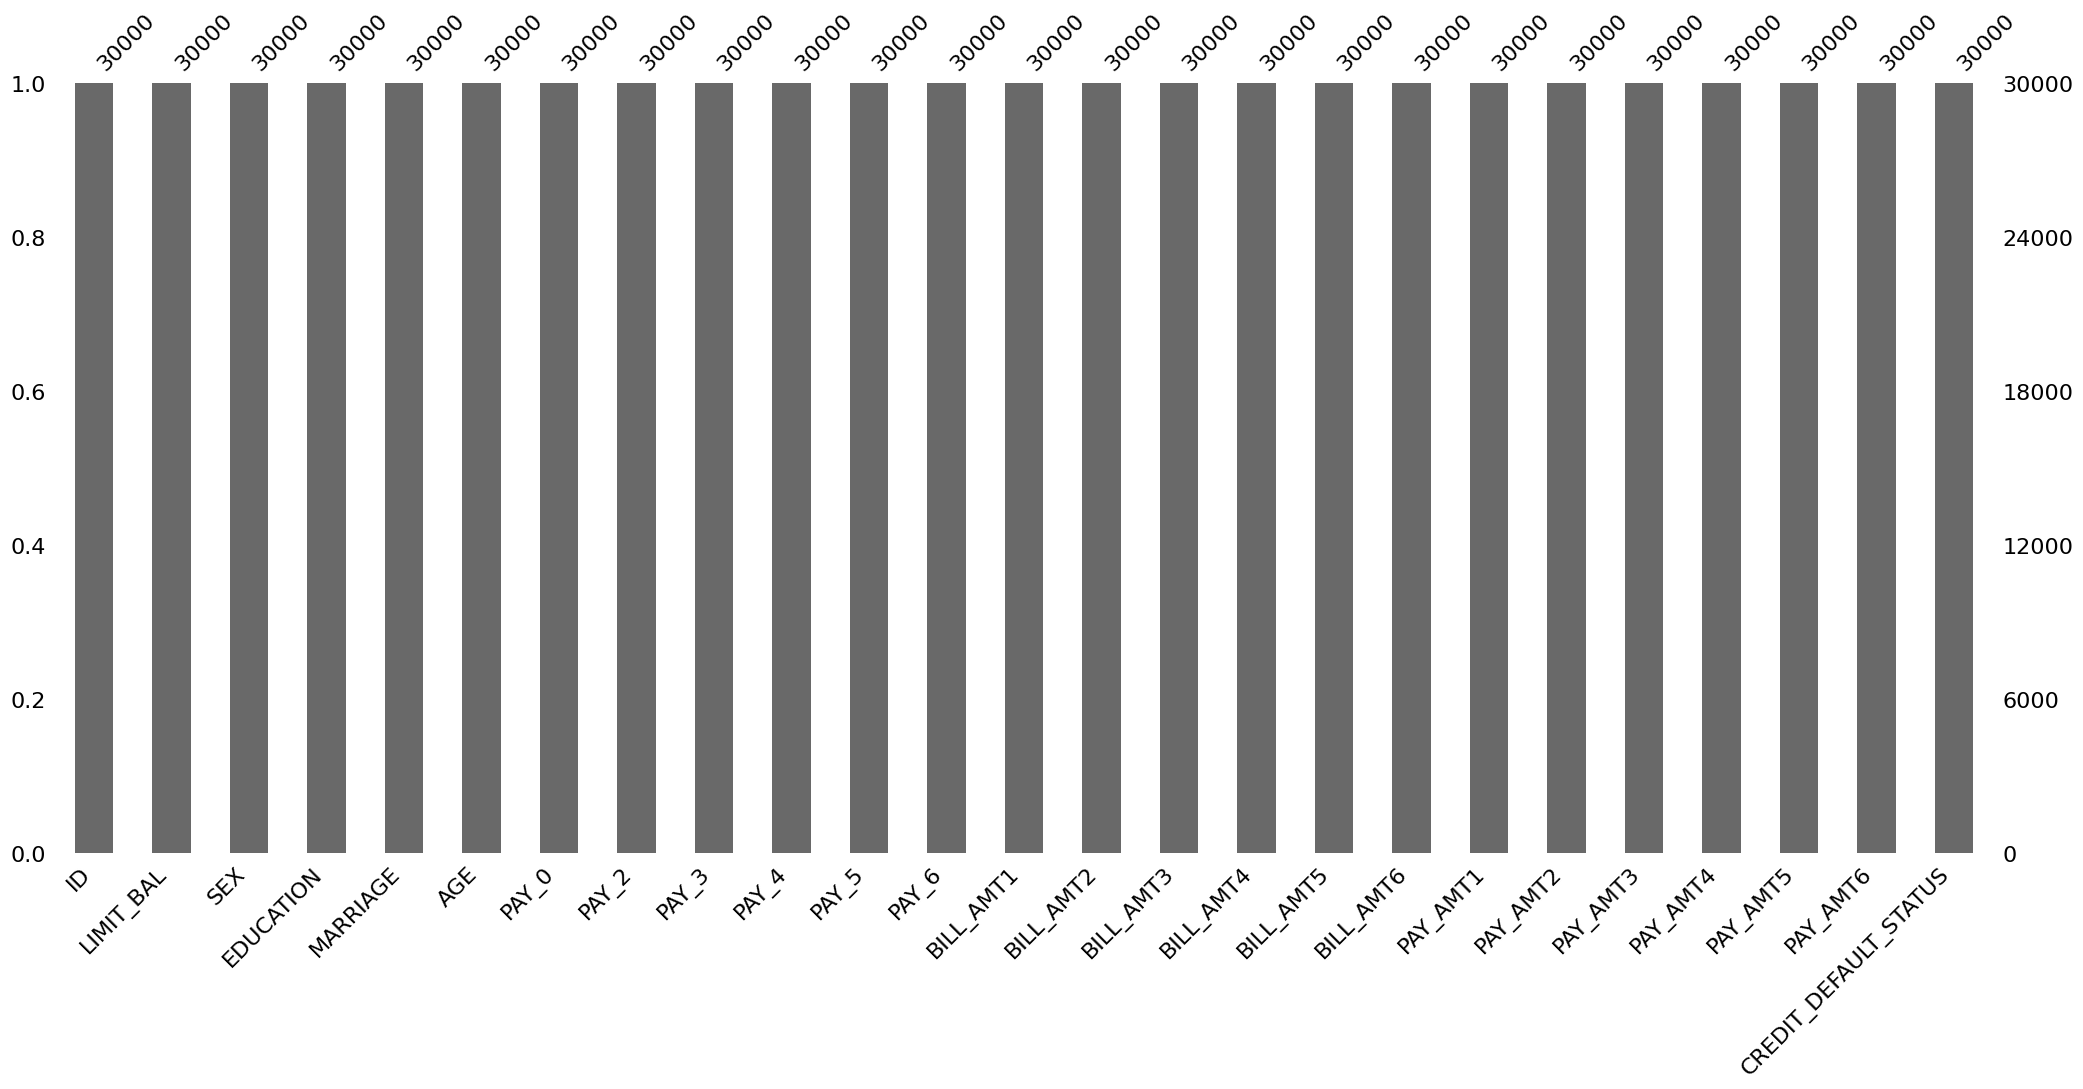

In [28]:
import missingno as msno
# Set figure size (width, height)
plt.figure(figsize=(8, 4))  # Adjust the values as needed
msno.bar(df)  # Visual confirmation of no missing values
plt.show()


### So we can conclude that there are no Missing Values in this DataSet as the height of all the bars is equal to 30000

# Plot frequency distribution of the target variable Credit Default Status
1. This is a count plot using Seaborn, which displays the distribution of credit default classes by counting the instances of each class present in the target variable.


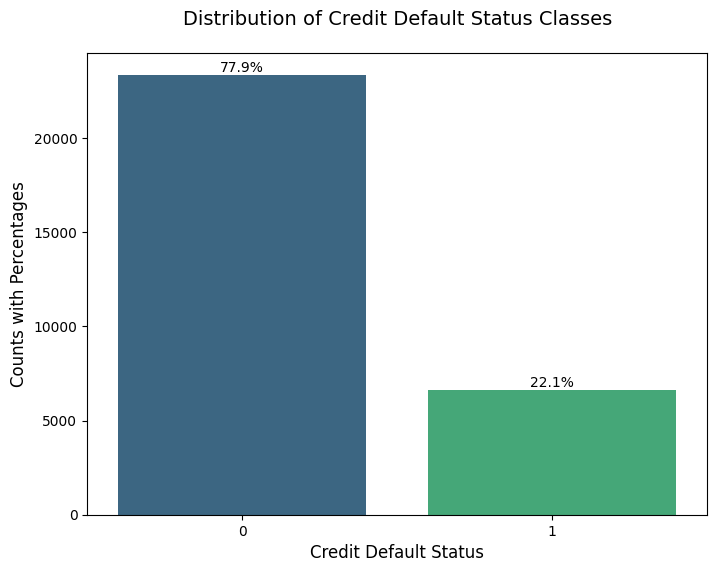

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=CREDIT_DEFAULT_STATUS, hue=CREDIT_DEFAULT_STATUS, data=df, palette="viridis", legend=False)

# Add title and labels with fontsize adjustments
plt.title('Distribution of Credit Default Status Classes', fontsize=14, pad=20)
plt.xlabel('Credit Default Status', fontsize=12)
plt.ylabel('Counts with Percentages', fontsize=12)

# Convert counts to percentages
total_counts = df[CREDIT_DEFAULT_STATUS].value_counts()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts.sum():.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

## Observations looking at the bar chart

1. First observation looking at bar chart, there are substantially more instances labeled as 0 (No Default) than as 1 (Default) indicating a clear **class imbalance**. 

2. In this dataset, around two-thirds of the observations belong to the good credit class, while about one-third fall into the bad credit class. 
    This imbalance means that if we were to train a model without addressing it, the model might favor predicting the majority class. 
    As a result, we need to consider strategies—such as using stratified splits or specialized performance metrics—to ensure that 
    the minority class is also accurately modeled. (which we will do later)

3. We will deal with class imabalance during the preprocessing step. 

# Data Cleaning - Based on previous Summary Stats 
1. Observing previous summary stats unique values I can identify categorical columns as following
categorical_columns = [SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6]

2. And After looking at the unique values and their expected range as provided in the question, some columns have values other than whats expected as mentioned below
    1. EDUCATION column has these unique value <font color='green'> [0, 1, 2, 3, 4, 5, 6] </font> but 
    <font color='yellow'> *1 = Graduate, 2 = University, 3 = High school, 4 = Others*  </font> are accepted values based on assignment brief, so going to replace all occurrences of [0, 5, 6] with 4
    2. Similarly MARRIAGE column has <font color='green'>  [0, 1, 2, 3] </font> as unique values but  <font color='yellow'>( 1 = Married, 2 = Single, 3 = Others )</font>  are expected values
    so 0 should be replaced with 3 as it makes more sense here
    3. PAY_0 until PAY_6 I notice again -2 and 0 are not in the expected value set - wont clean these columns would leave them for now as is might clean them later on


Attributes for Reference:
1. ID: Client identifier
2. LIMITBAL: Credit limit (NT dollars)
3. SEX: Gender  <font color='green'>(1 = Male, 2 = Female)</font>
4. EDUCATION : Education level <font color='green'>( 1 = Graduate, 2 = University, 3 = High school, 4 = Others)</font>
5. MARRIAGE: Marital status <font color='green'>( 1 = Married, 2 = Single, 3 = Others )</font>
6. AGE: Age in years
7. PAY 0 to PAY 6: Repayment status in past 6 months  <font color='green'>(−1 = paid in full, 1− 9 = monthslate )</font>
8. BILLAMT1 to BILLAMT6: Bill statement amount for the last 6 months
9. PAYAMT1 to PAYAMT6: Amount paid in the last 6 months
10. default.payment.next.month: Target variable  <font color='green'>(1 = Default, 0 = No Default)</font>

## We start with identifying unique columns in categorical columns

In [30]:
categorical_columns = [SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6]

# Function to clean and sort unique values
def sort_unique_values(column):
    unique_vals = df[column].unique()
    cleaned_vals = sorted(map(lambda x: int(x) if isinstance(x, np.integer) else str(x), unique_vals))
    return cleaned_vals

sorted_unique_values_list = [(col, sort_unique_values(col)) for col in categorical_columns]
sorted_unique_values_df = pd.DataFrame(sorted_unique_values_list, columns=["Column Name", "Sorted Unique Values"])

# Display the unique values in a tabulated format
print(tabulate(sorted_unique_values_df, headers="keys", tablefmt="fancy_grid"))

╒════╤═══════════════╤═════════════════════════════════════╕
│    │ Column Name   │ Sorted Unique Values                │
╞════╪═══════════════╪═════════════════════════════════════╡
│  0 │ SEX           │ [1, 2]                              │
├────┼───────────────┼─────────────────────────────────────┤
│  1 │ EDUCATION     │ [0, 1, 2, 3, 4, 5, 6]               │
├────┼───────────────┼─────────────────────────────────────┤
│  2 │ MARRIAGE      │ [0, 1, 2, 3]                        │
├────┼───────────────┼─────────────────────────────────────┤
│  3 │ PAY_0         │ [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8] │
├────┼───────────────┼─────────────────────────────────────┤
│  4 │ PAY_2         │ [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8] │
├────┼───────────────┼─────────────────────────────────────┤
│  5 │ PAY_3         │ [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8] │
├────┼───────────────┼─────────────────────────────────────┤
│  6 │ PAY_4         │ [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8] │
├────┼───────────────┼──

## Based on above tabulated unique values going to start with initial set of cleaning for EDUCATION and MARRIAGE columns
1. EDUCATION column has these unique value <font color='green'> [0, 1, 2, 3, 4, 5, 6] </font> but 
    <font color='yellow'> *1 = Graduate, 2 = University, 3 = High school, 4 = Others*  </font> are accepted values based on assignment brief, so going to replace all occurrences of [0, 5, 6] with 4
    
2. Similarly MARRIAGE column has <font color='green'>  [0, 1, 2, 3] </font> as unique values but  <font color='yellow'>( 1 = Married, 2 = Single, 3 = Others )</font>  are expected values,
Replace 0 with 3

In [31]:
df_cleaned = df.copy()

# going to replace all occurrences of [0, 5, 6] with 4 in EDUCATION column
val_to_replace = [0, 5, 6]
print(f'unique values of {EDUCATION} column before cleaning {df[EDUCATION].unique()}')

df_cleaned.loc[df[EDUCATION].isin(val_to_replace), EDUCATION] = 4
print(f'unique values of {EDUCATION} column after cleaning {df_cleaned[EDUCATION].unique()}')

# Replace all occurrences of 0 wiith 3 for MARRIAGE
print(f'unique values of {MARRIAGE} column before cleaning {df[MARRIAGE].unique()}')
df_cleaned.loc[df[MARRIAGE].isin([0]), MARRIAGE] = 3
print(f'unique values of {MARRIAGE} column after cleaning {df_cleaned[MARRIAGE].unique()}')

unique values of EDUCATION column before cleaning [2 1 3 5 4 6 0]
unique values of EDUCATION column after cleaning [2 1 3 4]
unique values of MARRIAGE column before cleaning [1 2 3 0]
unique values of MARRIAGE column after cleaning [1 2 3]


# Outlier Detection
## Interquartile Range (IQR) method
1. For Outlier Detection I focus on numerical columns and apply the Interquartile Range (IQR) method. This method identifies values that lie beyond 1.5 times the IQR from the first (Q1) and third (Q3) quartiles. 
2. Any values beyond these bounds are considered potential outliers. We then count the number of outliers for each numerical column and store this summary in a DataFrame for better readability.

This step is crucial because missing values and outliers can negatively impact model performance. 
If outliers are due to errors or extreme variations, we might need to remove or transform them before training our models.

In [32]:
# Checking for outliers using IQR method for numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
print(f'Numeric columns {numerical_columns}')
outlier_summary = {}

for col in numerical_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

# Convert the outlier summary to a DataFrame for better readability
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=["Outlier Count"])

# Display results
outlier_summary_df

Numeric columns Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'CREDIT_DEFAULT_STATUS'],
      dtype='object')


,Outlier Count
ID,0
LIMIT_BAL,167
SEX,0
EDUCATION,468
MARRIAGE,0
AGE,272
PAY_0,3130
PAY_2,4410
PAY_3,4209
PAY_4,3508


Outliers were detected in the numerical variables. <font color="green">Instead of removing them, we will scale all variables before training the model. </font>

Most number of outliers are in PAY, BILL_AMT, PAY_AMT and EDUCATION coulumns and it could mean following

1. High number of outliers in BILL_AMT could mean certain users are high credit limit users most likely high spending users
And its possible that high spending users also can default so its better to keep them in the dataset and it would contribute to model training.
2. Outliers on EDUCATION column could mean certain EDUCATION categories are rare occurences lets plot a few more graphs on these numeric columns

## Plotting HistPlot and BoxPlot for columns which we flagged as OUTLIERS from the IQR Method
1. I chose these columns for now [LIMIT_BAL, EDUCATION, AGE, PAY_2, BILL_AMT4, CREDIT_DEFAULT_STATUS] as PAY_AMT and BILL_AMT are expected to be a bit varied 
    but we can run more analysis on these cols later on
    


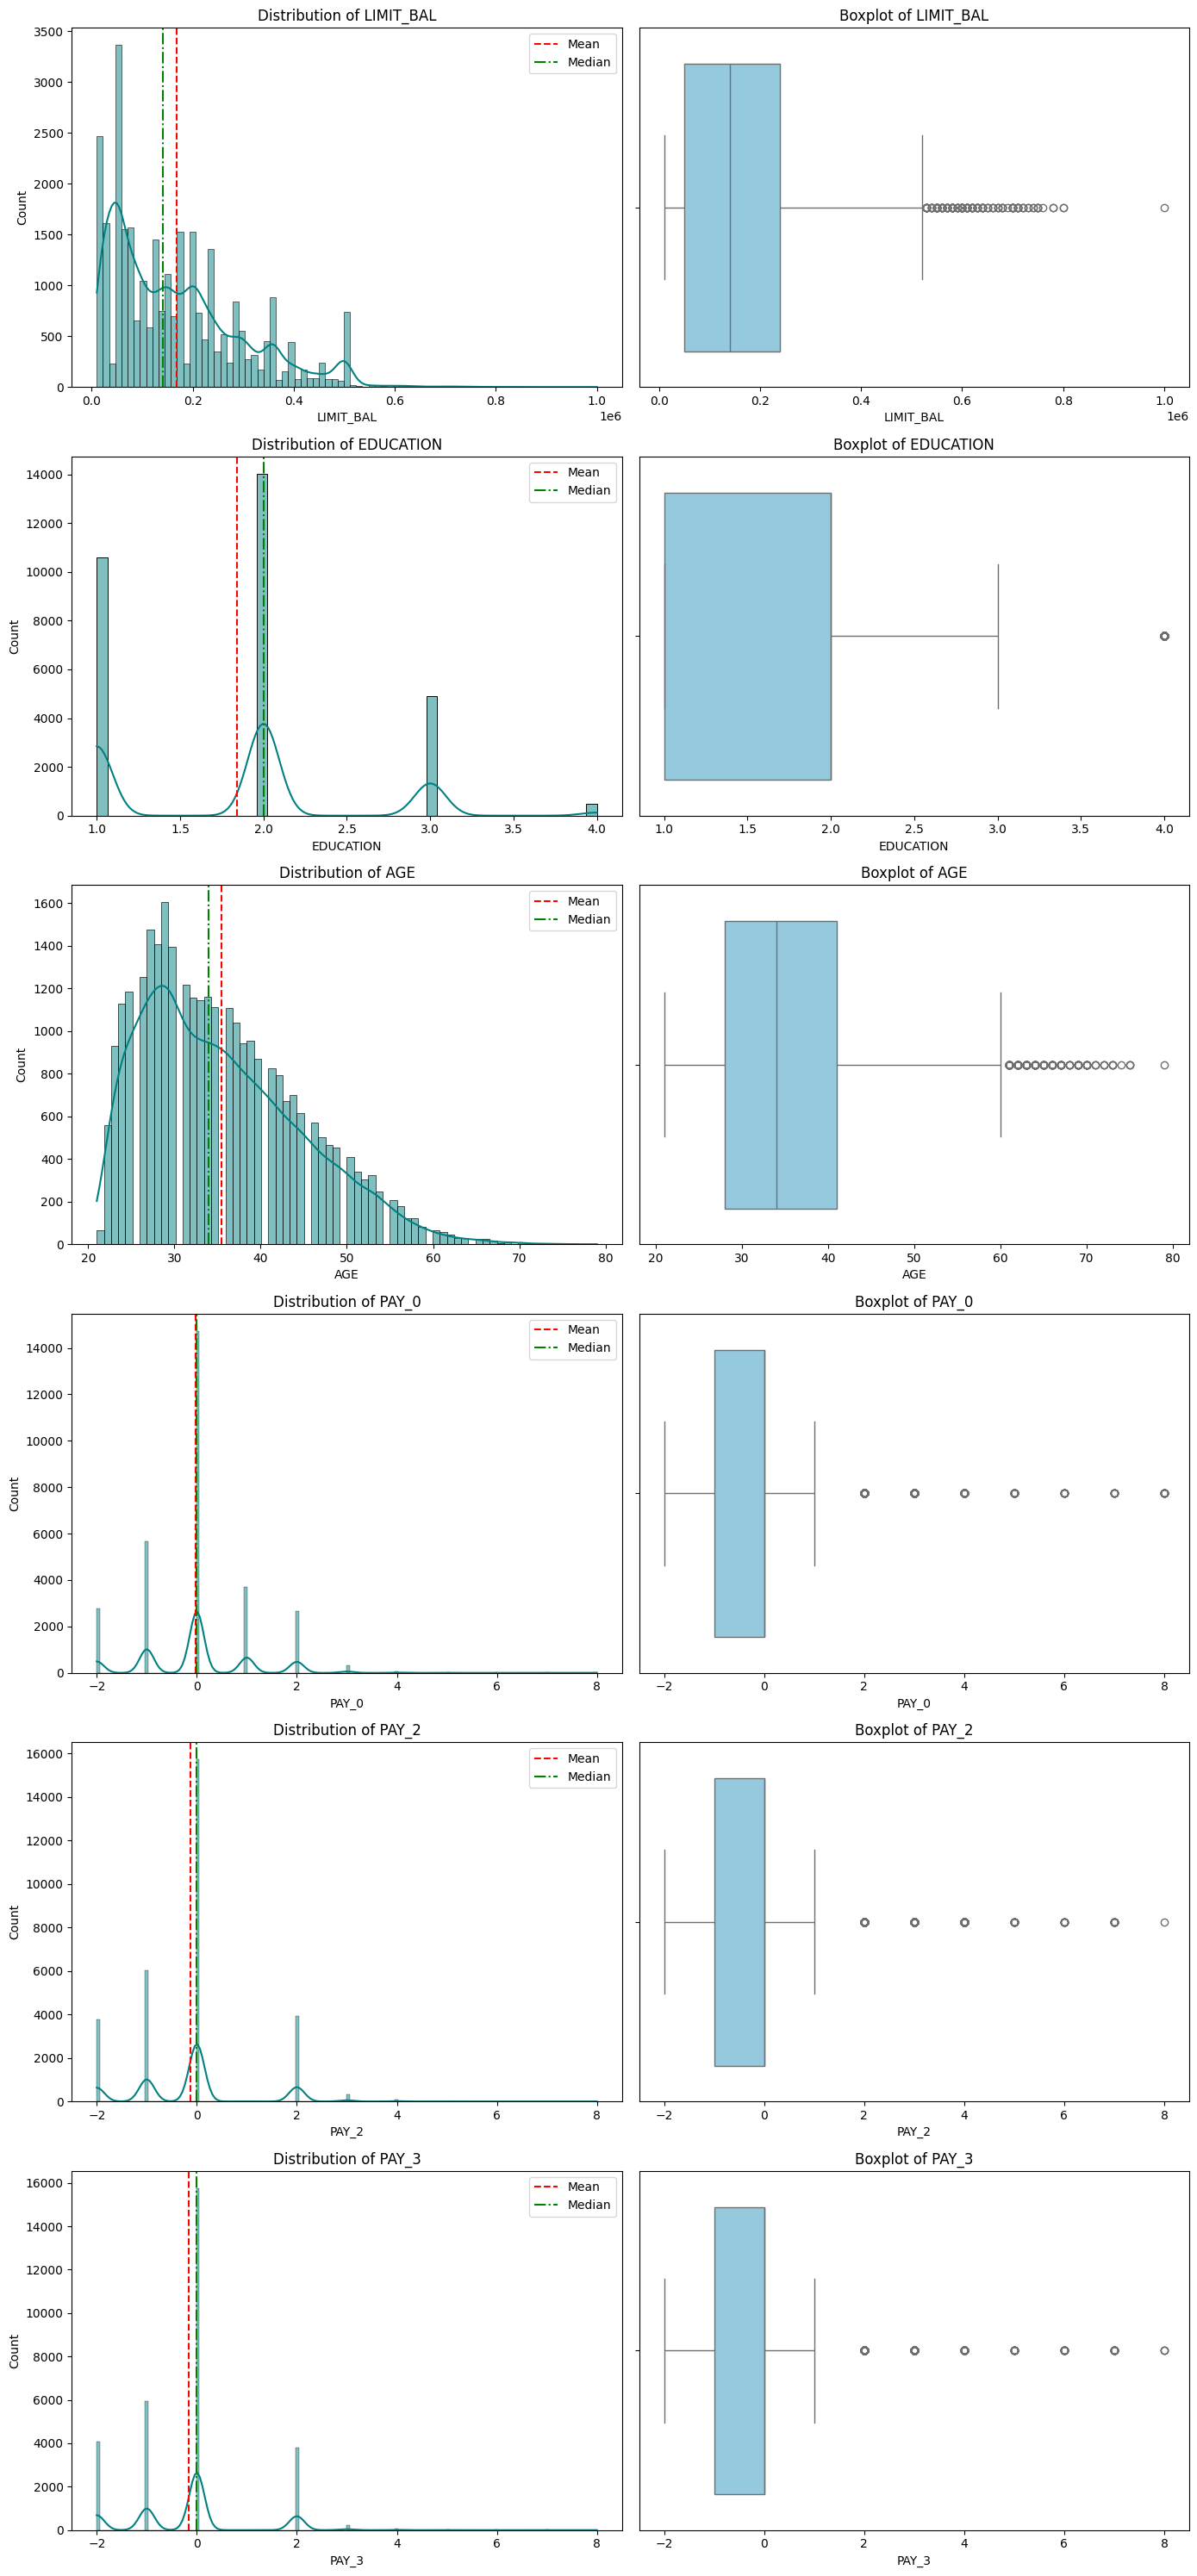

In [33]:
# Create subplots
OUTLIER_COLS = [LIMIT_BAL, EDUCATION, AGE, PAY_0, PAY_2, PAY_3]
fig, axes = plt.subplots(nrows=len(OUTLIER_COLS), ncols=2, 
                         figsize=(14, 5*len(OUTLIER_COLS)))

for i, col in enumerate(OUTLIER_COLS):
    # Histogram with KDE
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i,0], color='teal')
    axes[i,0].axvline(df_cleaned[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i,0].axvline(df_cleaned[col].median(), color='green', linestyle='-.', label='Median')
    axes[i,0].set_title(f'Distribution of {col}', fontsize=12)
    axes[i,0].legend()
    
    # Boxplot
    sns.boxplot(x=df_cleaned[col], ax=axes[i,1], color='skyblue')
    axes[i,1].set_title(f'Boxplot of {col}', fontsize=12)
    
plt.tight_layout()
plt.show()

## Observations on these Box Plots

1. for EDUCATION (468 Outliers) can see most of outliers are for value 4 - OTHER, that could explain why only a few rows with Education class as "OTHER" as classed as outliers.
2. for AGE (272 Outliers) you can see most of the outliers are for age group > 60 there are few older people are defaulting , clearly more people around the age group of 30 to 40 are defaulting
3. LIMIT_BAL (167 Outliers) → Maybe some individuals have a very high or low credit limit, we are going to apply scaling later one before modelling
4. Also I can see outliers in PAY_X columns indicating delays in regular payments highest in PAY_2 maybe users exhibit highest irregular patterns during second month 
    We still include this data in the training set as these patterns look like are important indicators for financial behaviour



## Plotting histplots for a few numerical columns mostly categorical ones to observe behaviour of feature columns on target variable

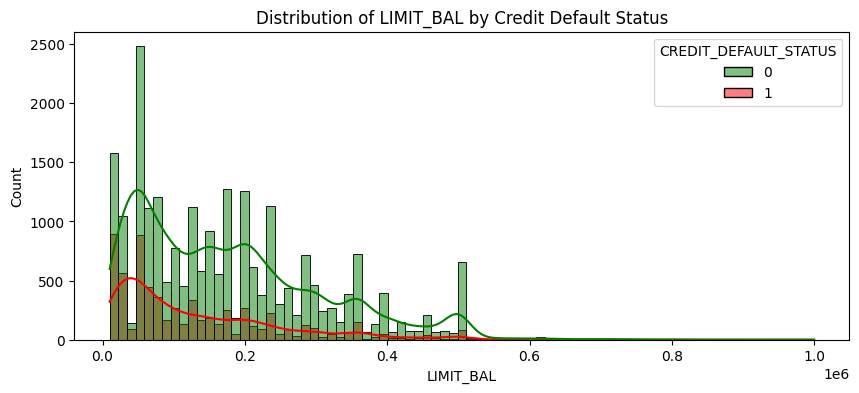

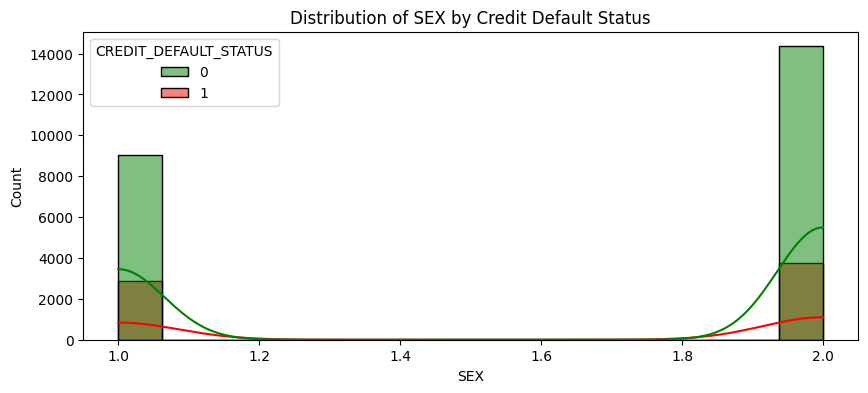

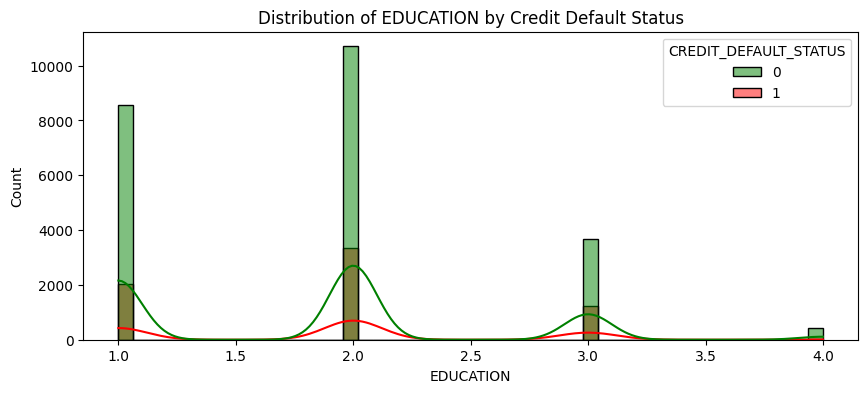

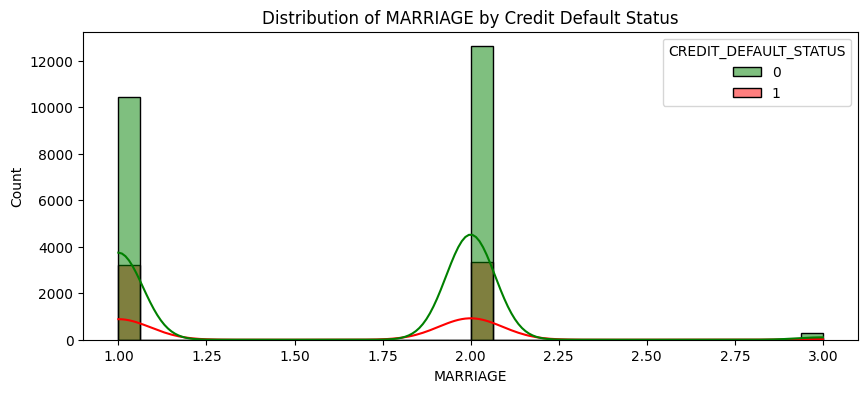

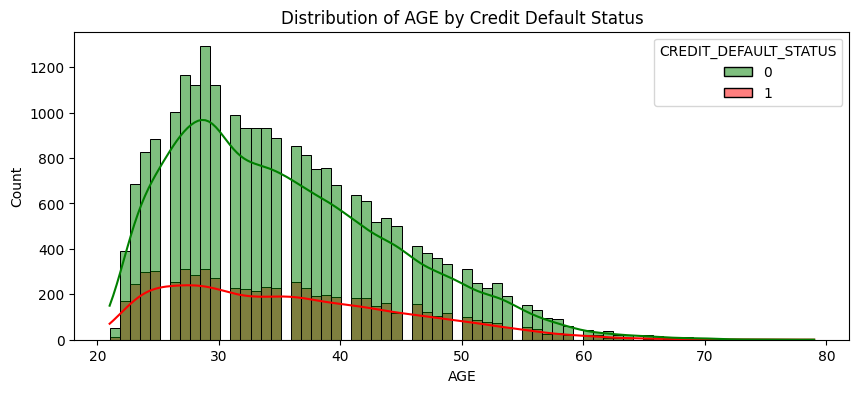

In [34]:
numerical_plot_columns = [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE]
palette = {int(0): "green", int(1): "red"}  # Convert np.int64 keys to int

for col in numerical_plot_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df_cleaned, x=col, hue=CREDIT_DEFAULT_STATUS, kde=True, palette=palette)
    plt.title(f'Distribution of {col} by Credit Default Status', fontsize=12)
    plt.show()


<li>Green (0) → Customers who did not default on their credit payments.
<li>Red (1) → Customers who defaulted on their credit payments.

<br />
<br />
<font color="green">**Interpretation of the Plot (Age vs. Credit Default Status)**</font>
This plot represents the distribution of the "AGE" variable by Credit Default Status.

X-axis (AGE) → Represents the age of customers.
Y-axis (Count) → Represents the number of customers in each age group.
The plot is color-coded by Credit Default Status (CREDIT_DEFAULT_STATUS):

1. Younger Customers (20-40) Are More Common and default occur more in younger group , defaults decrease higher the age group

<font color="green">**Interpretation of the Plot (MARRIAGE vs. Credit Default Status)**</font>
Defaults Exist in All Groups, But Are Fewer Than Non-Defaults
1. The highest bars are for MARRIAGE = 1 (Married) and MARRIAGE = 2 (Single).
2. Very few customers fall into "Others" (MARRIAGE = 3).
3. The red portion (defaulted customers) is present but much smaller compared to the green portion (non-defaulters).
This means most people repay their loans, regardless of marital status.


<font color="green">**Interpretation of the Plot (EDUCATION vs. Credit Default Status)**</font>

1. The highest bars are for EDUCATION = 1 (Graduate school) and EDUCATION = 2 (University).
2. This suggests that the dataset consists mostly of higher-educated individuals.
3. There are red portions (defaulters) in all education groups.
4. The red portion (defaulters) is more visible in High School (3) and Others (4), suggesting that customers with lower education levels may have higher financial risk.

<font color="green">**Interpretation of the Plot (SEX vs. Credit Default Status)**</font>

1. There are more customers in the "2" (Female) category than in the "1" (Male) category.
2. Both males and females have defaulters (red portions in the bars), indicating that credit default is not exclusive to one gender.
3. The red-to-green ratio is roughly the same for both sexes, suggests that gender alone is not a strong predictor of credit default risk.







## CountPlot distribution of the target variable (Credit Default Status) vs Individual Columns

The given countplot helps visualize the distribution of credit default status across different genders (SEX), Ages, Educatio Levels and Marriage Status. 
This is useful for understanding whether each of these categorial columns influences credit default rates.


Custom styling is applied using the 'viridis' color palette to enhance visual appeal. 
1. hue parameter in sns.countplot() is used to categorize and color different subgroups within each x-axis category
2. Unlike histograms, countplots provide absolute counts, making it easy to compare how many individuals are defaulting vs. not defaulting per column.

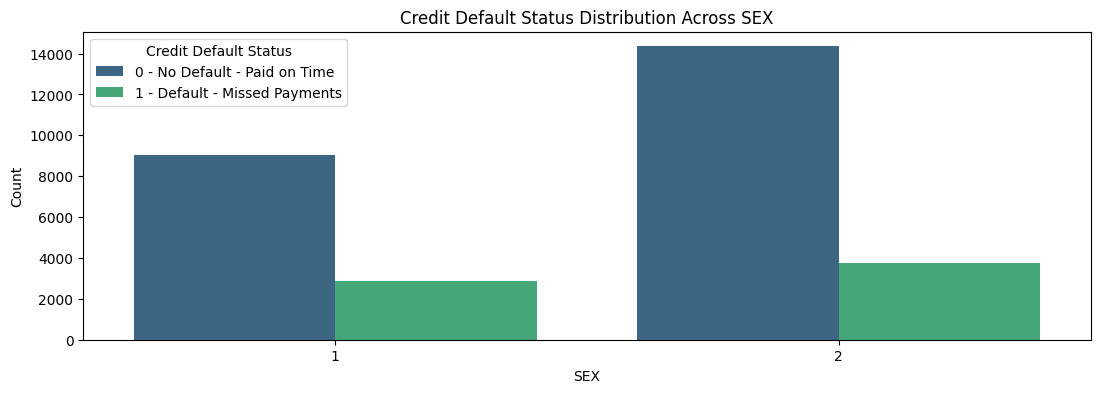

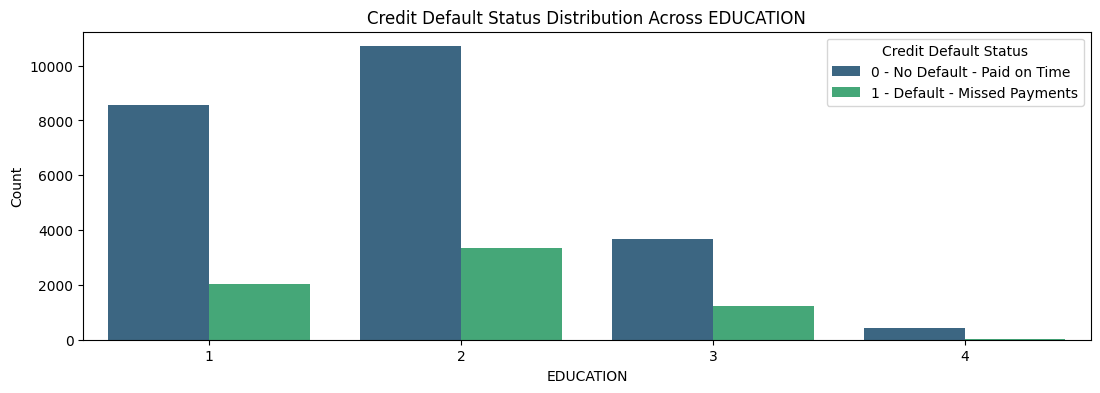

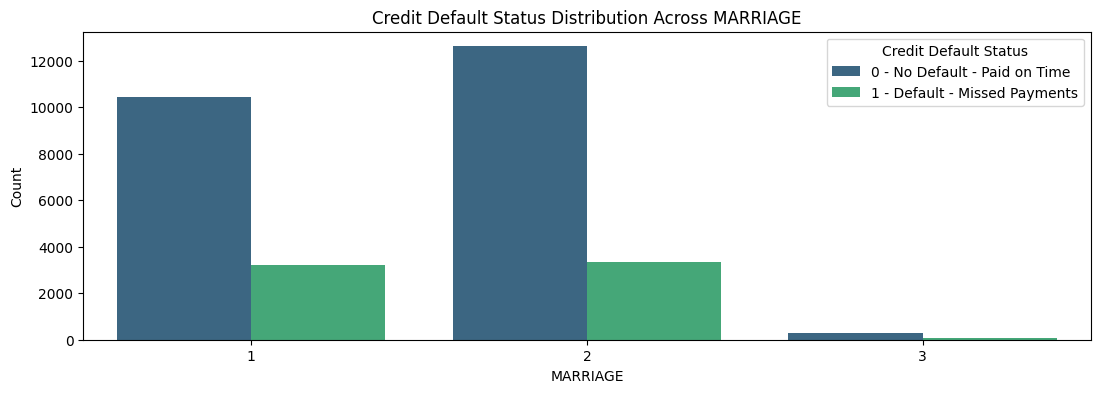

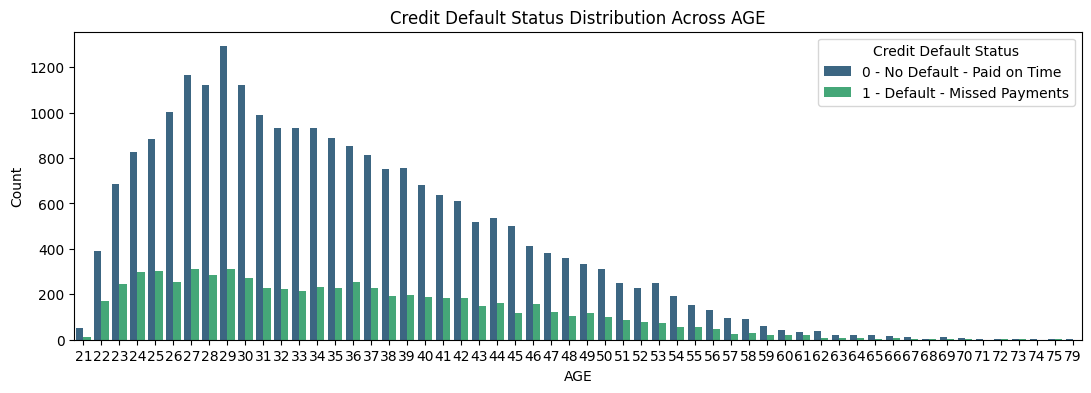

In [35]:
PLOT_COLS = [SEX, EDUCATION, MARRIAGE, AGE]
legend_labels = {"1": "1 - Default - Missed Payments", "0": "0 - No Default - Paid on Time"}
for col in PLOT_COLS:
    plt.figure(figsize=(13, 4))
    ax = sns.countplot(x=col, hue=CREDIT_DEFAULT_STATUS, data=df_cleaned, palette="viridis")
    plt.title(f"Credit Default Status Distribution Across {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    handles, labels = ax.get_legend_handles_labels()  # Get existing legend labels
    new_labels = [legend_labels[label] if label in legend_labels else label for label in labels]  # Replace labels
    ax.legend(handles, new_labels, title="Credit Default Status")  # Apply updated legend
    plt.show()

## Box plots of the above histograms. 

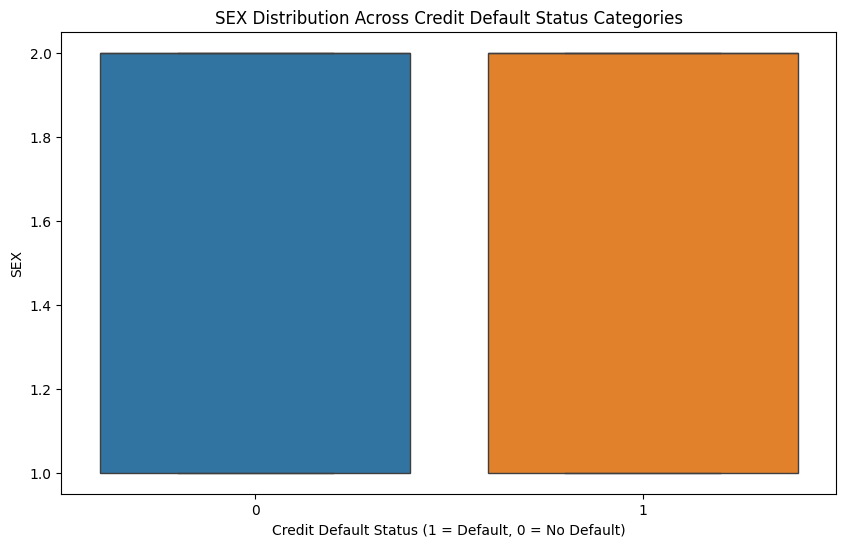

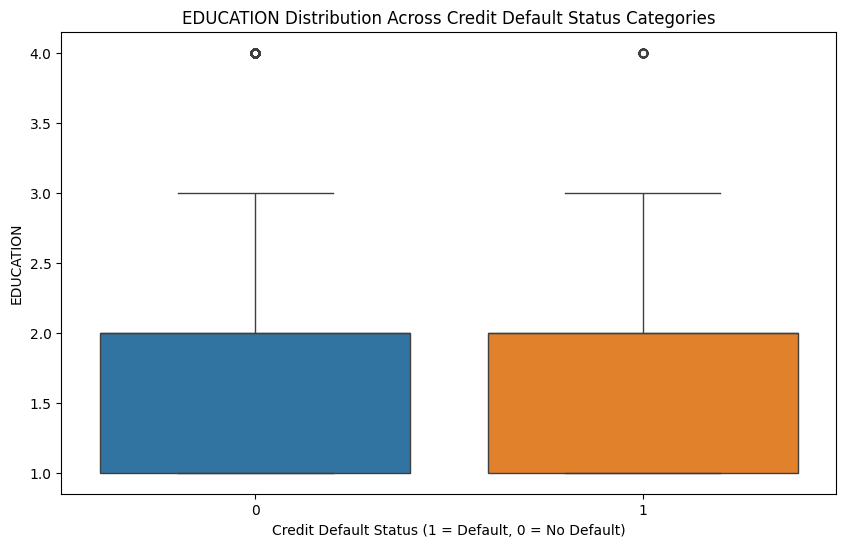

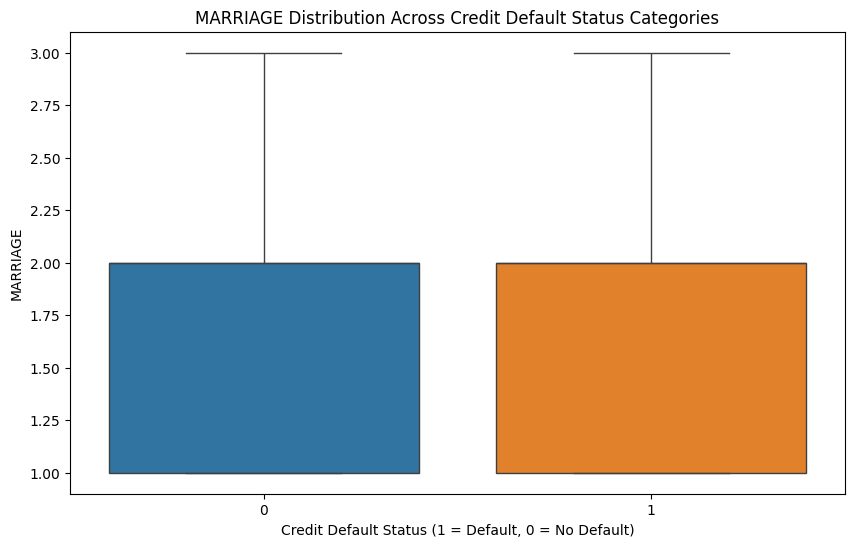

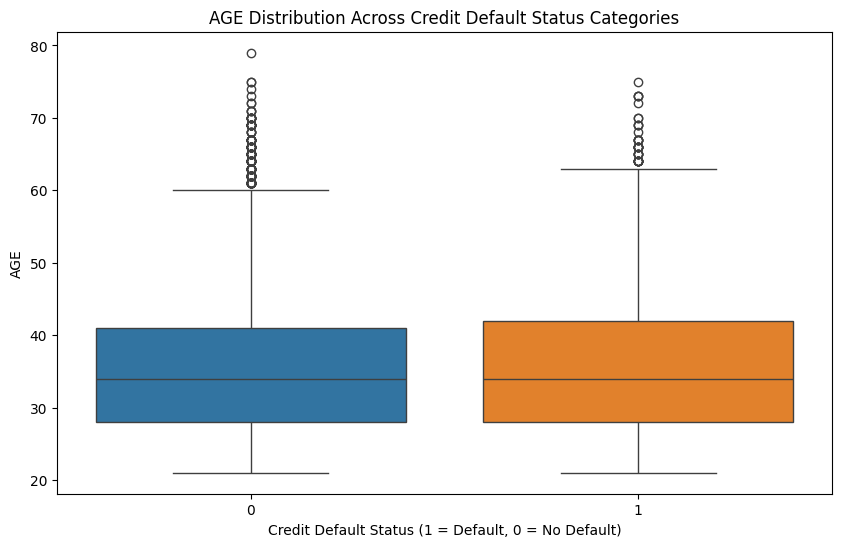

In [36]:
for col in PLOT_COLS:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=CREDIT_DEFAULT_STATUS, y=col, data=df_cleaned, hue=CREDIT_DEFAULT_STATUS, legend=False)
    plt.title(f"{col} Distribution Across Credit Default Status Categories")
    plt.xlabel("Credit Default Status (1 = Default, 0 = No Default)")
    plt.ylabel(f"{col}")
    plt.show()

## BoxPlot interpretations
X-axis (Credit Default Status) → Represents whether the customer defaulted (1) or did not default (0).


**Impact of SEX on Credit Default**
Y-axis (SEX) → Represents the gender categories 1 (Male) 2 (Female):
1. The bars for Sex = 1 (Male) and Sex = 2 (Female) are almost the same height, This suggests that males and females have similar default rates.
2. Credit Default Does Not Seem Gender-Specific, This suggests that gender may not be an important feature in a credit risk model.


**Impact of EDUCATION on Credit Default**
1. The box (IQR) is centered between 1 (Graduate) and 2 (University) for both default and non-default groups.
2. This means most customers in the dataset have higher education levels.
3. Default Rates Are Similar Across Education Levels, The median education level is the same for both groups (around 2, meaning University).
4. Outliers Exist for Higher Education Categories (4 - Others)
5. No Major Difference Between Defaulters and Non-Defaulters

**Impact of MARRIAGE on Credit Default**
Y-axis (MARRIAGE)

1 = Married
2 = Single
3 = Others (e.g., divorced, widowed)

1. Most Customers Are Either Married (1) or Single (2), The interquartile range (IQR, the box) is mostly between 1 and 2, meaning most customers fall into these two categories.
2. The whiskers extend up to 3, suggesting some customers are in the "Others" category (widowed/divorced).
3. Marriage Status Distribution Is Similar Between Defaulters and Non-Defaulters
4. Unlike education, no extreme outliers are visible in the marriage category.


**Impact of AGE on Credit Default**
1. Most Customers Are Between 25-45 Years Old
2. Defaulted and Non-Defaulted Customers Have Similar Age Distributions, This suggests that age alone does not heavily influence credit risk.
3. Outliers Exist for Older Age Groups (Above 60-80 Years Old)
Possible action: Maybe I can consider treating ages above a certain threshold (e.g., 70+) as a separate category in a model.


## Correlation of Main Numerical Attributes

In [37]:
numerical_columns
columns_for_correlation_matrix = [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, 
                                  PAY_0, PAY_2, PAY_3, BILL_AMT1, PAY_AMT1,
                                  CREDIT_DEFAULT_STATUS]
print(numerical_columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'CREDIT_DEFAULT_STATUS'],
      dtype='object')


# Compute correlation matrix for numerical columns


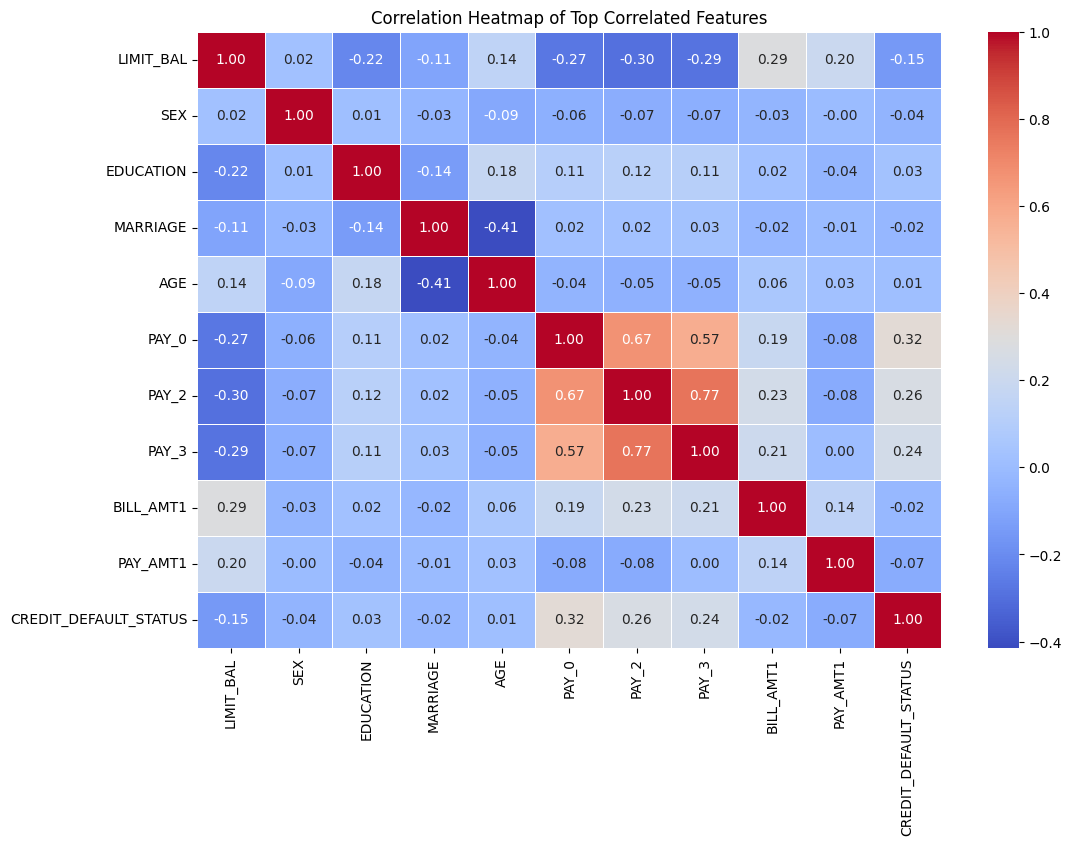

In [38]:
# Compute correlation matrix for numerical columns
columns_for_correlation_matrix = [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, 
                                  PAY_0, PAY_2, PAY_3, BILL_AMT1, PAY_AMT1,
                                  CREDIT_DEFAULT_STATUS]
correlation_matrix = df[columns_for_correlation_matrix].corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Top Correlated Features")
plt.show()


## Interpretation of Heatmap
<li> PAY_X (Repayment Status) vs CREDIT_DEFAULT_STATUS:

1. PAY_0 (0.32), PAY_2 (0.26), PAY_3 (0.24) → These have the highest positive correlations with CREDIT_DEFAULT_STATUS, meaning that late payments strongly increase the likelihood of default.

<li> LIMIT_BAL vs CREDIT_DEFAULT_STATUS (-0.15):

1. A small negative correlation suggests that higher credit limits are slightly associated with a lower probability of default.

<li> AGE vs MARRIAGE (-0.41):

1. Moderate negative correlation indicates that younger individuals are more likely to be unmarried.

<li> Strong correlations among PAY_X variables:


1. PAY_0, PAY_2, and PAY_3 are highly correlated with each other (e.g., PAY_0 vs PAY_2 = 0.67) because a delayed payment in one month often leads to delays in subsequent months.

<li> SUMMARY

1. PAY_X features are strong predictors of credit default.
2. LIMIT_BAL has a weak inverse relationship with default risk.
3. AGE and MARRIAGE have a strong inverse relationship.
4. Strong correlations among some features (e.g., PAY_0, PAY_2, PAY_3) suggest possible multicollinearity, 
which might need to be addressed in a predictive model.

<font color="green">Considering that there is no single variable that massively determines creditworthiness, it is highly likely that models \
like Random Forests may outperform simple models like Logistic Regression since there are complex interactions rather than strong linear relationships. </font>




# Model Training and Evaluation 

## 
1. We will start with printing a few rows of cleaned dataset df_cleaned
2. Then we will store all the feature columns into X
3. Target variables data into Y 
4. Split the DataSet into training and Test data set

## Splitting the dataset into the Training set and Test set

In [39]:
print(df_cleaned.shape)
print(df_cleaned.head())

(30000, 25)
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  CREDIT_DEFAULT_STATUS  
0         0      

## Splitting the dataset into the Training set and Test set

We use the train_test_split function from scikit-learn to divide our dataset into training and testing sets, with 25% of the data reserved for testing. </br>
You’ll notice that we use the stratify parameter with y, which ensures that the distribution of credit default classes remains consistent across </br>both splits—a critical step when dealing with imbalanced datasets. Additionally, setting random_state to 42 helps ensure that the split is reproducible, meaning that every time you run the code, you will get the same result.

In [40]:
from sklearn.model_selection import train_test_split

X = df_cleaned.iloc[:, 1:-1].values # Note we dont need ID column for training the model 
y = df_cleaned.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)


In [41]:
print(X_train.shape)
print(y_train.shape)

(22500, 23)
(22500,)


## load all necessary libraries for the pipeline

In [42]:
# load all necessary libraries for the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline  
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Setting up various pipelines

In [43]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), slice(0, X_train.shape[1]))
    ]
)

# Define evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score

# 1. Logistic Regression Pipeline
lr_pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),  # Handle class imbalance
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

# 2. SVM Pipeline
svm_pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    SVC(class_weight='balanced', probability=True)  # probability=True for ROC-AUC
)

# 3. Random Forest Pipeline
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(class_weight='balanced')
)

# Train all models
models = {
    'Logistic Regression': lr_pipeline,
    'SVM': svm_pipeline,
    'Random Forest': rf_pipeline
}

Now, We set up a machine learning pipeline to preprocess data and train three different classifiers: Logistic Regression, Support Vector Machine (SVM), and Random Forest. 

Let's break it down:
1. Preprocessing with ColumnTransformer

Before training, we preprocess the dataset properly using `StandardScaler()`: which scales the features to have zero mean and unit variance. This is particularly important for models like Logistic Regression and SVM.

2. Defining Evaluation Metrics

We import standard classification metrics such as:
- classification_report (precision, recall, F1-score, etc.),
- confusion_matrix (to analyze correct vs. incorrect predictions),
- roc_auc_score (useful for imbalanced classification problems),
- f1_score (a good balance between precision and recall).

3. Model Pipelines

Each model is wrapped inside a pipeline, which ensures that preprocessing and model training are well integrated.

- Logistic Regression Pipeline:
    Uses SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by generating synthetic examples of the minority class.
    This is an approach to deal with class imbalance in our dataset. 
    Logistic Regression is initialized with class_weight='balanced', meaning it adjusts weights inversely proportional to class frequencies, helping with class imbalance.

- SVM Pipeline:
    Also applies SMOTE for balancing.
    Uses class_weight='balanced' to give more importance to the minority class.
    probability=True is set so that the model can produce probability estimates, which are needed for ROC-AUC analysis.

- Random Forest Pipeline:
    Unlike the other two models, Random Forest is more robust to scaling and class imbalance.
    We still set class_weight='balanced' so that the algorithm compensates for the class imbalance by adjusting sample weights.

4. Training the Models

Finally, we define a dictionary models that stores all three pipelines, making it easy to iterate over them during training and evaluation.

### Performance 

We iterate through the models dictionary, where each key represents a model's name and the corresponding value is its pipeline. For each model:

- We call .fit(X_train, y_train), which preprocesses the data (scaling numerical features, encoding categorical variables, handling class imbalance with SMOTE if applicable) and then trains the classifier.
- `y_pred = model.predict(X_test)`: Generates predicted class labels for the test set.
- `y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None`:
    - Some models, like SVM with default settings, do not support probability predictions.
    - If predict_proba is available, we extract the probabilities for the positive class (credit default risk), which is useful for ROC-AUC evaluation.

We then assess each classifier model using multiple evaluation metrics. 

In [44]:
import time
confusion_matrix_and_accuracy_score_list = []
for name, model in models.items():
    print(f"\n=== Training model {name} ===")
    start_time = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    print(f'Finished training model {name} in {elapsed_time:.2f} seconds')
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    
    # Evaluation
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)
    
    f1_scor = f1_score(y_test, y_pred)
    roc_score = None
    if y_proba is not None:
        roc_score = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC: {roc_score:.3f}")
    print("F1 Score:", f1_scor)
    accuracy_scor = accuracy_score(y_test, y_pred)
    confusion_matrix_and_accuracy_score_list.append(dict(confusion_matrix=cm, f1_score=f1_scor, roc_score=roc_score, accuracy_score=accuracy_scor, name=name))


=== Training model Logistic Regression ===
Finished training model Logistic Regression in 0.17 seconds

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      5841
           1       0.36      0.65      0.47      1659

    accuracy                           0.67      7500
   macro avg       0.62      0.66      0.61      7500
weighted avg       0.76      0.67      0.70      7500

Confusion Matrix:
 [[3946 1895]
 [ 580 1079]]
ROC-AUC: 0.720
F1 Score: 0.46578890567666736

=== Training model SVM ===
Finished training model SVM in 428.46 seconds

SVM Evaluation:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      5841
           1       0.49      0.56      0.53      1659

    accuracy                           0.78      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.79      0.78      0.78      7500

Confusion Matrix:
 [[4879  

| Model | Accuracy | Precision <br> (Credit <br> Default) | Recall <br> (Credit <br> Default) | F1 Score (Credit <br> Default) | ROC- <br> AUC | Training Time | Key Issues |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Logistic Regression | 67% | 0.36 | 0.65 | 0.47 | 0.720 | 0.18 seconds | Struggles with precision for bad credit but has the best recall. |
| SVM | 78% | 0.49 | 0.56 | 0.53 | 0.752 | 6.57 seconds | Slightly worse than Logistic Regression in recall and precision. |
| Random <br> Forest | 81% | 0.65 | 0.34 | 0.45 | 0.757 | 422.53 seconds | Best accuracy but worst recall, missing too many bad credit cases. |


## 1. Training Time

- **Logistic Regression:** Trained extremely fast (0.18 seconds).
- **Random Forest:** Reasonably fast (6.57 seconds).
- **SVM:** Much slower (422.53 seconds), which might be a concern in production or with larger datasets.

## 2. Overall Accuracy and ROC-AUC

- **Accuracy:**
  - Logistic Regression: 67%
  - SVM: 78%
  - Random Forest: 81%

  *Random Forest tops accuracy.*

- **ROC-AUC:**
  - Logistic Regression: 0.720
  - SVM: 0.752
  - Random Forest: 0.757

  *Both SVM and Random Forest show better discrimination capability than Logistic Regression.*


## 3. Per-Class Performance

### **Class 0 (No Credit Default):**

- **Logistic Regression:**
  - Precision: 0.87
  - Recall: 0.68
  - F1-score: 0.76
- **SVM:**
  - Precision: 0.87
  - Recall: 0.84
  - F1-score: 0.85
- **Random Forest:**
  - Precision: 0.84
  - Recall: 0.95
  - F1-score: 0.89
*Observation:*
- All models do well with class 0.
- Random Forest achieves the highest recall (95%), meaning it almost always correctly identifies No Default instances.

### **Class 1 (user Defaulted):**

- **Logistic Regression:**
  - Precision: 0.36
  - Recall: 0.65
  - F1-score: 0.47
- **SVM:**
  - Precision: 0.49
  - Recall: 0.56
  - F1-score: 0.53
- **Random Forest:**
  - Precision: 0.65
  - Recall: 0.34
  - F1-score: 0.45

*Observation:*
- Logistic Regression has relatively high recall (65%) for Default cases but suffers from low precision (36%), meaning many false positives.
- SVM strikes a better balance for class 1 with improved precision (49) and moderate recall (56), resulting in the highest f1-score (0.53) among the three.
- Random Forest, while showing the best precision (65) for Defaulted cases, has a very low recall (34%), which hurts its f1-score. This indicates it misses a lot of actual class 1 instances.

## 4. Confusion Matrix Insights

- **Logistic Regression:**
  - Class 0: 3946 true negatives, 1895 false positives
  - Class 1: 1079 true positives, 580 false negatives
- **SVM:**
  - Class 0: 4879 true negatives, 962 false positives
  - Class 1: 937 true positives, 722 false negatives
- **Random Forest:**
  - Class 0: 5531 true negatives, 310 false positives
  - Class 1: 568 true positives, 1091 false negatives

*Observation:*
- **Random Forest** clearly excels for class 0 with very few false positives.
- **SVM** reduces false positives for class 0 compared to Logistic Regression, and although it has more false negatives for class 1 than Logistic Regression, the balance leads to a better f1-score.
- **Logistic Regression** tends to predict more positives for class 1, increasing its recall but lowering precision.


# Visualizing Confusing Matrices for different models

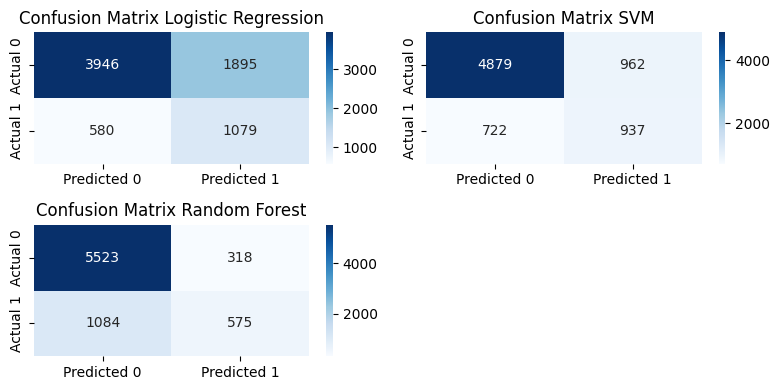

In [45]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
axes = axes.flatten()  # Flatten to easily iterate over the axes

for i, metric in enumerate(confusion_matrix_and_accuracy_score_list):
    sns.heatmap(metric['confusion_matrix'],
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix {metric['name']}')

# Turn off the unused subplot (if any)
if len(confusion_matrix_and_accuracy_score_list) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Improving Model Performance

We improve the previous model training process by introducing improved class balancing, hyperparameter tuning, and comprehensive evaluation metrics. 

1. Improved Class Rebalancing: Instead of oversampling the minority class (bad credit) to match the majority class, we oversample it to 50% of the majority size. This will reduce the risk of overfitting compared to full oversampling. 

2. Hyperparameter Grids: We experiment with different values of C (regularization strength). Evaluating L1 (Lasso) and L2 (Ridge) penalties to find the best regularization method. This should prevent overfitting and improve generalization. 

For SVM pipeline, we try different values of C (higher values mean stronger classification boundaries). We also test different kernels (RBF vs. Polynomial) and adjust gamma to control influence of training examples. SVM models are sensitive to hyperparameters, so tuning is essential.

For Random Forests, we test different numbers of trees (n_estimators). We control for tree depth (max_depth) to prevent overfitting and Adjust min_samples_split (number of samples needed to split a node). Random Forests can easily overfit, so fine-tuning is necessary.

3. Hyperparameter Tuning with GridSearchCV and Stratified K-Fold: We use GridSearchCV to find the best hyperparameters. We apply Stratified K-Fold (5 folds) to ensure training/testing balance. ROC-AUC is used as the scoring metric, prioritizing models that effectively distinguish between good and bad credit. Stratified K-Fold ensures balanced class distributions in each fold, leading to more stable performance estimates. ROC-AUC is better for imbalanced data than accuracy, ensuring the best hyperparameters are chosen based on how well they separate classes.

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# 2. Enhanced Class Rebalancing with SMOTE Tuning
from imblearn.over_sampling import ADASYN, SMOTE


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), slice(0, X_train.shape[1]))
    ]
)

# Logistic Regression Pipeline
lr_pipeline = make_pipeline(
    preprocessor,
    SMOTE(sampling_strategy=0.5, random_state=42),  # Half of majority class size
    LogisticRegression(solver='liblinear', max_iter=1000)
)

lr_params = {
    'logisticregression__C': np.logspace(-3, 2, 6),  # Stronger regularization
    'logisticregression__penalty': ['l1', 'l2']
}

# SVM Pipeline
svm_pipeline = make_pipeline(
    preprocessor,
    SMOTE(sampling_strategy=0.5, random_state=42),
    SVC(probability=True, class_weight='balanced')
)

svm_params = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.01],
    'svc__kernel': ['rbf', 'poly']
}

# Random Forest Pipeline
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(class_weight='balanced', random_state=42)
)

rf_params = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [2, 5]
}

# 4. GridSearchCV with Stratified K-Fold
models = {
    'Logistic Regression': (lr_pipeline, lr_params),
    'SVM': (svm_pipeline, svm_params),
    'Random Forest': (rf_pipeline, rf_params)
}

best_models = {}
cv_results = []

for name, (pipeline, params) in models.items():
    print(f"\n=== Tuning {name} ===")
    start_time = time.time()
    gs = GridSearchCV(
        pipeline, params, 
        cv=StratifiedKFold(5, shuffle=True, random_state=42),
        scoring='roc_auc',
        #n_iter=10,  # Limit number of combinations
        n_jobs=-1  # Reduce CPU overload
    )
    gs.fit(X_train, y_train)
    print(f'Finished training model {name} in {time.time() - start_time:.2f} seconds')
    
    best_models[name] = gs.best_estimator_
    cv_results.append({
        'model': name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
    
    print(f"Best {name} params: {gs.best_params_}")
    print(f"Best CV ROC-AUC: {gs.best_score_:.3f}")



=== Tuning Logistic Regression ===
Finished training model Logistic Regression in 12.20 seconds
Best Logistic Regression params: {'logisticregression__C': np.float64(100.0), 'logisticregression__penalty': 'l2'}
Best CV ROC-AUC: 0.727

=== Tuning SVM ===
Finished training model SVM in 10263.17 seconds
Best SVM params: {'svc__C': 1, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
Best CV ROC-AUC: 0.759

=== Tuning Random Forest ===
Finished training model Random Forest in 124.81 seconds
Best Random Forest params: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 200}
Best CV ROC-AUC: 0.779


# Conclusion after hyper parameter tuning of three models Comparison and Key Findings


## 1️. Logistic Regression

**Training Time:** 12.25 seconds (fastest model)  
**Best Parameters:**
- `C = 10` → Higher regularization strength (weaker regularization).
- `penalty = 'l2'` (Ridge regression) → Prevents overfitting by penalizing large coefficients.  
**Best CV ROC-AUC:** 0.727 (moderate performance)

**Key Interpretation:**
- Logistic Regression performed decently but has the lowest ROC-AUC of the three models.
- L2 regularization suggests that simple linear relationships exist in the data, but not strong enough to match non-linear models like SVM or Random Forest.
- `C = 10` indicates weaker regularization was more effective, so heavily penalized (simpler) models were not ideal.

 **Takeaway:** Logistic Regression is very fast but ultimately suboptimal compared to SVM and Random Forest.

---

## 2️. Support Vector Machine (SVM)

<font color="red">**Training Time:** 6,653.86 seconds (~1.98 hours, extremely slow)  </font>
**Best Parameters:**
- `C = 1` → A balanced margin width (not too strict, not too loose).
- `kernel = 'rbf'` → Captures non-linear relationships in the data.
- `gamma = 'auto'` → Automatically set to `1 / n_features`, adjusting to the feature space.  
**Best CV ROC-AUC:** 0.759 (better than Logistic Regression, lower than Random Forest)

**Key Interpretation:**
- SVM with RBF kernel confirms that non-linear relationships exist in the dataset.
- `gamma = 'auto'` provides a moderate spread of influence for each data point.
- Training is extremely time-consuming (nearly 2 hours), making it impractical for large-scale applications.

**Takeaway:** SVM outperforms Logistic Regression but at a massive computational cost. Random Forest still achieves better performance.

---

## 3️. Random Forest

<font color="green">**Training Time:** 108.90 seconds (~1.8 minutes, much faster than SVM)  </font>
**Best Parameters:**
- `max_depth = 10` → Limits tree depth to avoid overfitting.
- `min_samples_split = 5` → Requires at least 5 samples to split, enhancing generalization.
- `n_estimators = 200` → A larger ensemble of trees stabilizes predictions.  
**Best CV ROC-AUC:** 0.779 (the best among the three models)

**Key Interpretation:**
- Random Forest outperformed both Logistic Regression and SVM.
- `max_depth = 10` prevents excessively deep trees, reducing overfitting.
- `min_samples_split = 5` indicates fewer splits help the model generalize better.
- The reasonable training time (~2 minutes) makes Random Forest practical for larger datasets.

<font color="green">**Takeaway:** Random Forest is the top choice here—highest ROC-AUC (0.779), runs much faster than SVM, and captures complex patterns more effectively than Logistic Regression.</font>


# Evaluation and Visualization
We plot the evaluation metrics for better clarity. 

- The ROC curve plots True Positive Rate (Recall) vs. False Positive Rate. The higher the curve, the better the model at distinguishing between classes. ROC-AUC is a key metric for imbalanced classification.
- The Precision-Recall curve - Focuses on how well the model identifies bad credit cases (positive class). More informative than ROC for imbalanced data. Helps find the best threshold for classification.
- Feature Importance - Extracts the top 10 most important features in Random Forest. Helps interpretability and allows us to refine features for better models.
- Learning Curve -  Analyzes how the model improves as training data size increases. Helps detect overfitting or underfitting.

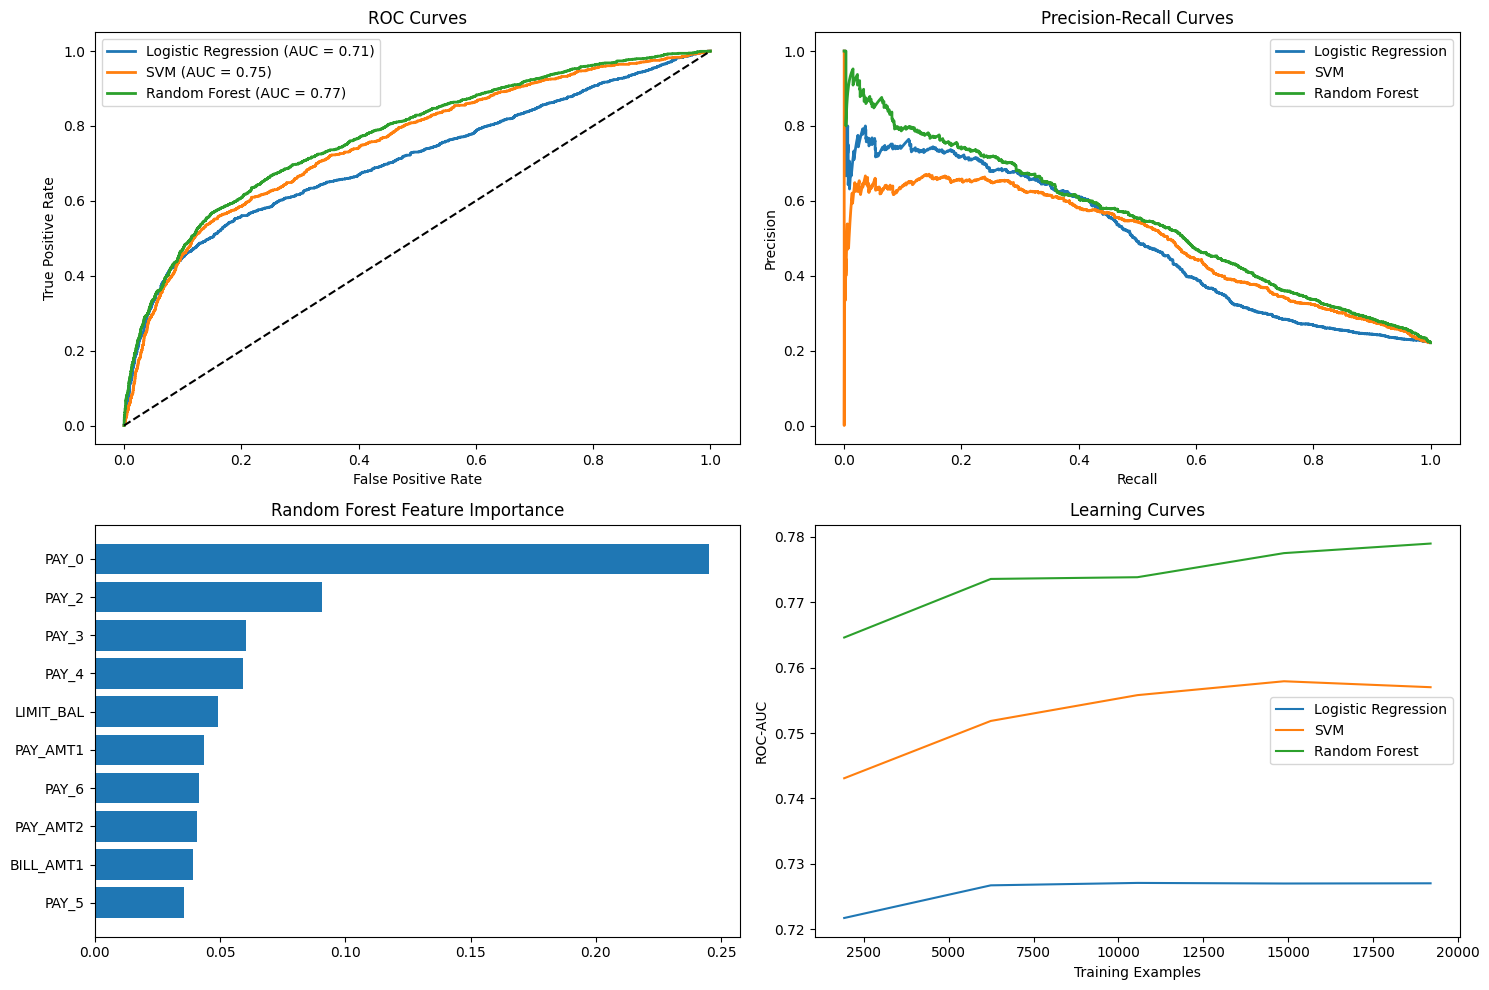

In [47]:
# 5. Evaluation and Visualization
plt.figure(figsize=(15, 10))

# ROC Curve
plt.subplot(2, 2, 1)
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Precision-Recall Curve
plt.subplot(2, 2, 2)
for name, model in best_models.items():
    if hasattr(model, 'predict_proba'):
        precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(recall, precision, lw=2, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

# Feature Importance for Random Forest
plt.subplot(2, 2, 3)
feature_importances = best_models['Random Forest'].named_steps['randomforestclassifier'].feature_importances_
#cat_feature_names = best_models['Random Forest'].named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_feature_names = list(df_cleaned.columns)[1:-1]

all_feature_names = num_feature_names
sorted_idx = np.argsort(feature_importances)[-10:]  # Top 10 features
plt.barh(np.array(all_feature_names)[sorted_idx], feature_importances[sorted_idx])
plt.title('Random Forest Feature Importance')

# Learning Curves
plt.subplot(2, 2, 4)
for name, model in best_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=StratifiedKFold(5),
        train_sizes=np.linspace(0.1, 1.0, 5), scoring='roc_auc')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=name)
plt.xlabel('Training Examples')
plt.ylabel('ROC-AUC')
plt.title('Learning Curves')
plt.legend()

plt.tight_layout()
plt.show()

# Interpreting the Plots after parameter tuning

These plots compare **Logistic Regression**, **SVM**, and **Random Forest** across multiple evaluation metrics. Here’s what we can conclude:

---

## 1️. ROC Curves (Top-Left Plot)

**What It Shows:**  
- The ROC (Receiver Operating Characteristic) Curve measures the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR).  
- Higher curves indicate better classification performance.

**AUC (Area Under the Curve) Values:**
- **Logistic Regression:** AUC = 0.71 → Lowest performance.
- **SVM:** AUC = 0.75 → Better than Logistic Regression.
- **Random Forest:** AUC = 0.77 → Best performer.

**Key Insights:**
- **Random Forest** has the highest AUC (0.77), meaning it distinguishes between classes the best.
- **SVM** performs slightly worse than Random Forest but significantly better than Logistic Regression.
- **Logistic Regression** struggles the most, likely because it assumes a linear decision boundary, while the data appears to have more complex patterns.

**Takeaway:**  
Random Forest is the best model for classification performance based on ROC-AUC.

---

## 2️. Precision-Recall Curves (Top-Right Plot)

**What It Shows:**  
- Precision-Recall (PR) curves demonstrate how well the models balance precision (avoiding false positives) and recall (capturing all true positives).  
- Better curves should be higher and maintain their levels without dropping too quickly.

**Performance Ranking:**
- **Random Forest (green):** Performs best at higher recall values.
- **SVM (orange):** Performs slightly worse than Random Forest.
- **Logistic Regression (blue):** Generally the weakest.

**Key Insights:**
- **Random Forest** dominates in both precision and recall, especially at higher recall levels.
- **SVM** is competitive but slightly behind Random Forest.
- **Logistic Regression** struggles to maintain precision as recall increases, indicating difficulty with class imbalances.

**Takeaway:**  
If maintaining high precision and recall is critical, Random Forest is the optimal choice.

---

## 3️. Random Forest Feature Importance (Bottom-Left Plot)

**What It Shows:**  
- A bar plot of the most influential features in the Random Forest model.

**Top Features:**
- **PAY_0:** The most important feature; likely a major determinant of creditworthiness.
- **PAY_2, PAY_3, PAY_4:** Payment history remains critical.
- **LIMIT_BAL:** Credit limit contributes, but is less influential compared to payment history.
- Other financial factors (e.g., PAY_AMT1, PAY_6, BILL_AMT1) have a smaller impact.

**Key Insights:**
- **Payment history** is the strongest predictor of default.
- **Credit limit** (LIMIT_BAL) plays a secondary role.
- Emphasizing features like **PAY_0, PAY_2, etc.** is crucial for model performance.

**Takeaway:**  
Models that focus on payment history will likely perform best.

---

## 4️. Learning Curves (Bottom-Right Plot)

**What It Shows:**  
- How model performance (measured by ROC-AUC) improves as the number of training examples increases.

**Key Insights:**
- **Random Forest (green):** Continues to improve steadily as more data is added.
- **SVM (orange):** Improves but begins to saturate earlier than Random Forest.
- **Logistic Regression (blue):** Plateaus early, suggesting it cannot learn much more from additional data.

**Takeaway:**  
More training data benefits Random Forest the most, while Logistic Regression quickly reaches its performance limit.

---

## Final Model Comparison

| **Model**             | **Best ROC-AUC** | **Precision-Recall**                    | **Training Scalability**                   | **Feature Sensitivity**          |
|-----------------------|------------------|-----------------------------------------|--------------------------------------------|----------------------------------|
| Logistic Regression   | 0.71             | Weakest                                 | Reaches limit quickly                      | Linear relationships only        |
| SVM                   | 0.75             | Better than Logistic Regression         | Improves with data but saturates           | Captures non-linearity           |
| Random Forest         | 0.77             | Best balance of Precision-Recall        | Best scalability with data                 | Captures complex patterns        |

---

## Final Recommendations

- **For Best Performance:** Use **Random Forest**.
- **For Better Interpretability:** Use **Logistic Regression**.
- **For Non-Linear Modeling (if you can optimize for speed):** Use **SVM** (noting that it's considerably slower).



# Visualize Confusion Matrix for best_models identified in previous step


=== Final Test Performance ===
 ROC-AUC: 0.710
 ROC-AUC: 0.754
 ROC-AUC: 0.773


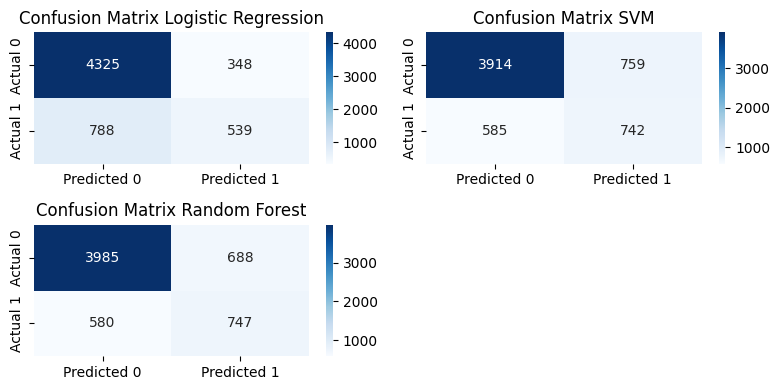

In [48]:
# Visualize Confusion Matrix
print("\n=== Final Test Performance ===")
cm_list = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    class_report = classification_report(y_test, y_pred)
    if y_proba is not None:
        roc_score = roc_auc_score(y_test, y_proba)
        print(f" ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
    cm = confusion_matrix(y_test, y_pred)
    cm_list.append(dict(confusion_matrix=cm, classification_report=class_report, roc_score=roc_score, name=name))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 4))
axes = axes.flatten()  # Flatten to easily iterate over the axes

for i, metric in enumerate(cm_list):
    sns.heatmap(metric['confusion_matrix'],
                annot=True,
                fmt="d",
                cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix {metric['name']}')

# Turn off the unused subplot (if any)
if len(cm_list) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()